In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')
print(X_train.shape)
print(X_test.shape)

(59, 2)
(59, 2)


In [28]:
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Activation
from helper import PlotLosses
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from helper import plot_boundaries, plot_boundaries_for_video
from matplotlib import pyplot as plt

In [29]:
# Paramtros fijos
input_shape = 2 # Tenemos solo 2 features
output_size = 1 # Solo tenemos 2 clases

# Parametros a modificar
hidden_units = 20 # Tratar de encontrar un tamaño optimo para el test set

# Probar distintos initializers
# kernel_initializer = 'zeros'
kernel_initializer = RandomNormal(mean=0.0, stddev=0.1, seed=None)

In [30]:
model = Sequential()
model.add(Dense(hidden_units,input_dim=input_shape))
model.add(Activation('sigmoid'))
model.add(Dense(output_size, kernel_initializer=kernel_initializer))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                60        
_________________________________________________________________
activation_5 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Para SGD lr=2 funciona ok pero muy lento: 40.000 epochs acc 1 (decay = 0) (20 hidden units)
# Para adam 0.4, decay = 0.002 converge enseguida (20 hidden units)
# Correrlo mas de una vez con los mismos parametros y verificar los resultados
lr = 0.4 # Modificarlo y ver que ocurre.
decay = 0.002 # Modificarlo y ver que ocurre
batch_size = 59 # 59 es el tamaño del train set. Seria hacer GD, en 1 seria SGD. Probar valores intermedios tambien
epochs = 4000

# Elejir uno de estos dos optimizadores. O buscar documentación y probar algun otro
# selectedOptimizer = optimizers.SGD(lr=lr, decay=decay)
selectedOptimizer = optimizers.adam(lr=lr, decay=decay)

# Lo compilo
model.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

In [32]:
# Se puede tocar plot_interval para acelerar el proceso, el resto recomendamos no tocarlo
plot_losses = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test)

In [33]:
checkpointer = ModelCheckpoint(filepath='./checkpoints/weights.{epoch:04d}-{acc:.2f}.hdf5', period=1)

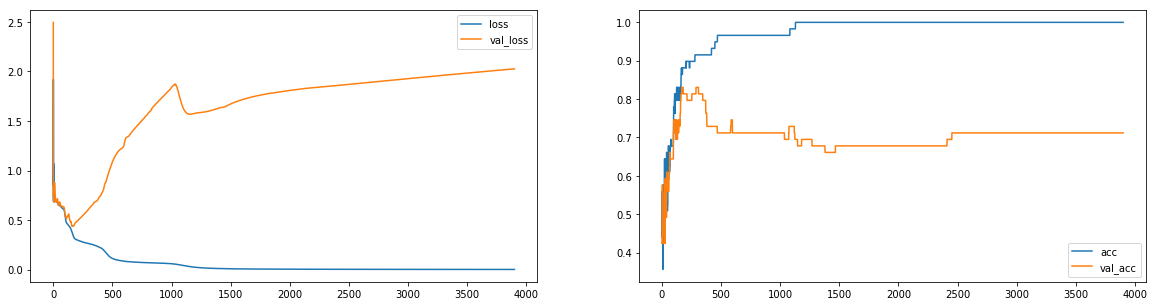

In [34]:
model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [35]:
import glob
files = []
for filename in glob.glob('./checkpoints/*.hdf5'):
    files.append(filename)
files = np.sort(files)

In [36]:
import numpy as np

def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.uint64)

In [37]:
gen_log_space(1670, 100)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         23,   24,   25,   27,   29,   30,   32,   34,   36,   38,   40,
         43,   45,   48,   50,   53,   56,   60,   63,   67,   71,   75,
         79,   84,   88,   93,   99,  104,  110,  117,  123,  131,  138,
        146,  154,  163,  172,  182,  193,  204,  215,  228,  241,  254,
        269,  284,  300,  317,  335,  355,  375,  396,  419,  442,  468,
        494,  522,  552,  584,  617,  652,  689,  728,  770,  813,  860,
        908,  960, 1015, 1072, 1133, 1198, 1266, 1338, 1414, 1494, 1579,
       1669], dtype=uint64)

1 0.44


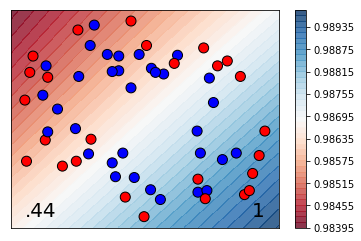

2 0.56


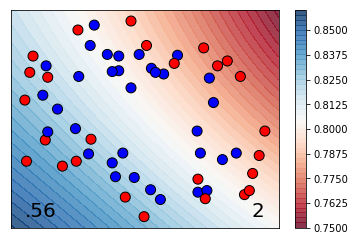

3 0.56


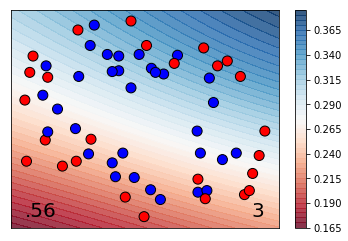

4 0.44


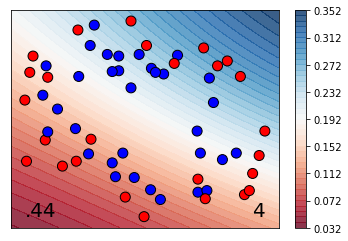

5 0.44


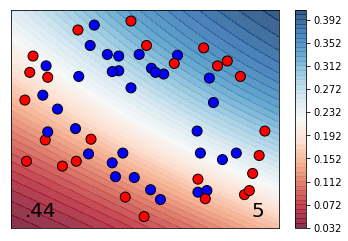

6 0.44


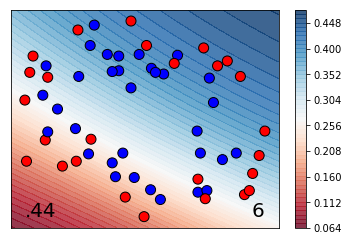

7 0.44


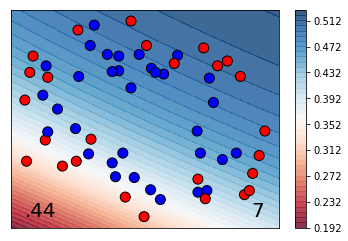

8 0.36


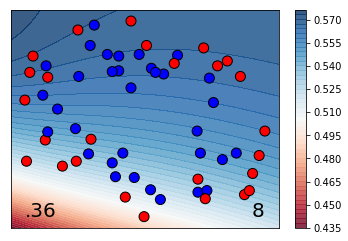

9 0.58


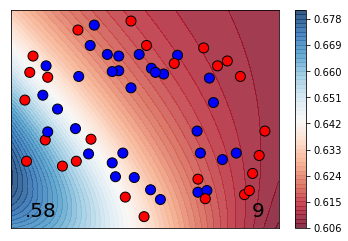

10 0.56


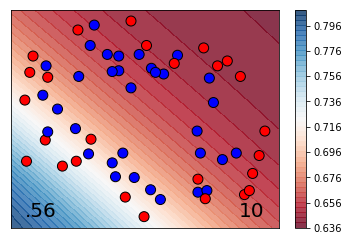

11 0.56


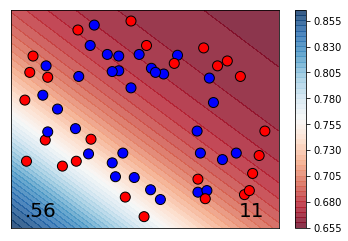

12 0.56


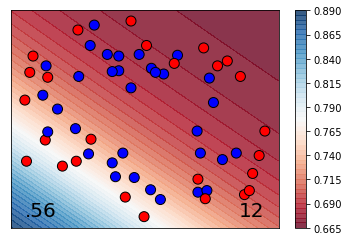

13 0.56


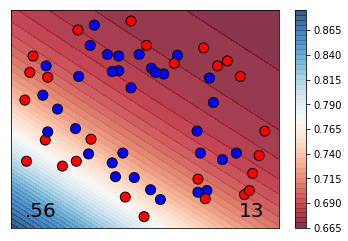

14 0.56


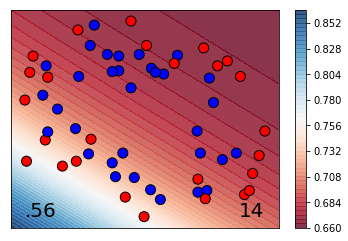

15 0.56


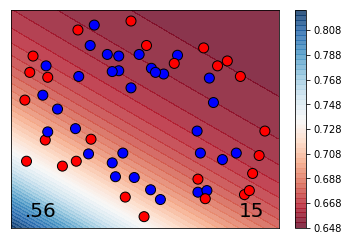

16 0.56


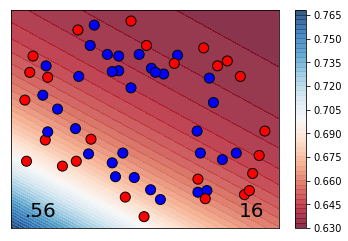

17 0.56


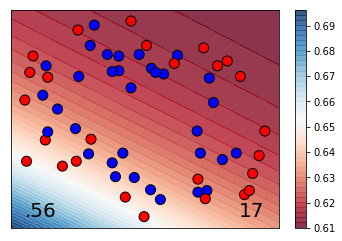

18 0.56


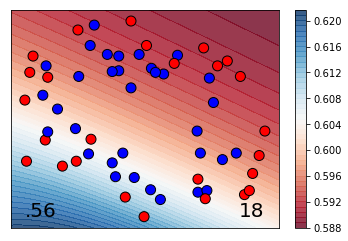

19 0.56


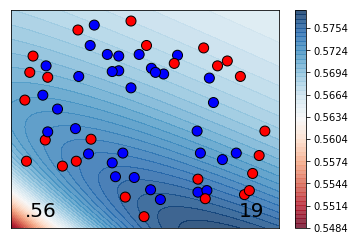

21 0.56


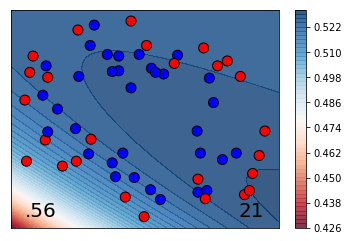

22 0.56


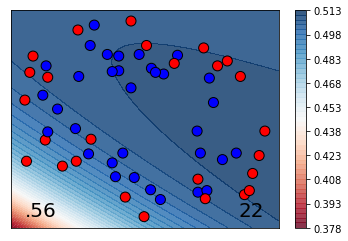

23 0.64


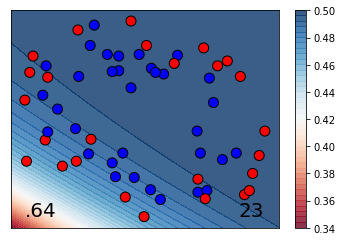

25 0.44


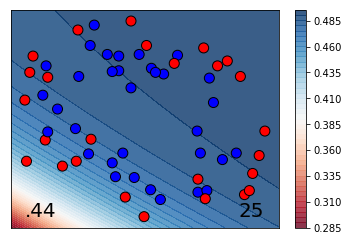

27 0.44


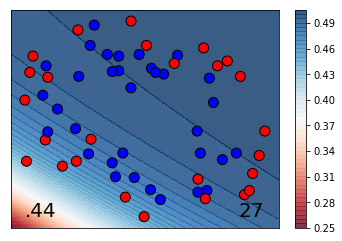

28 0.46


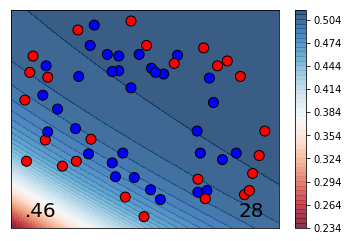

30 0.59


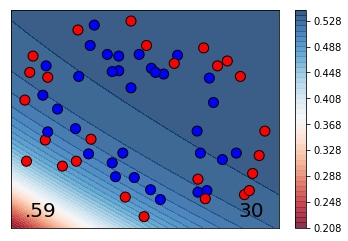

32 0.61


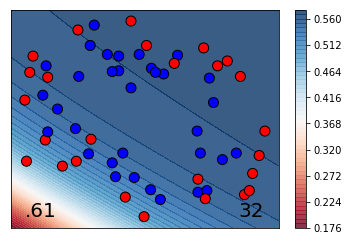

34 0.58


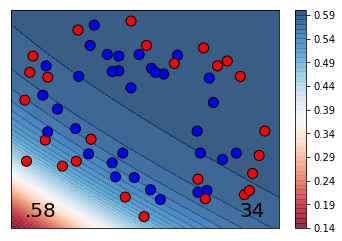

37 0.61


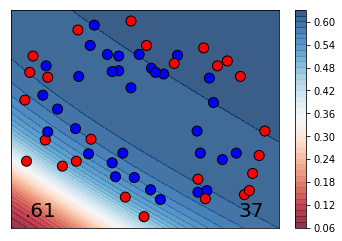

39 0.63


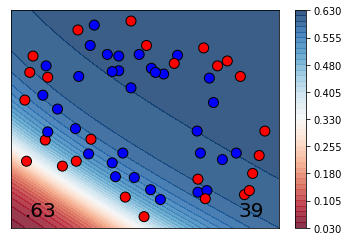

42 0.63


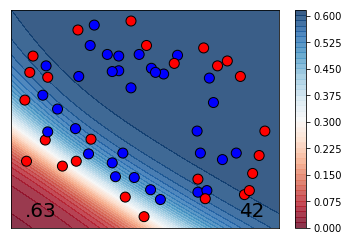

44 0.56


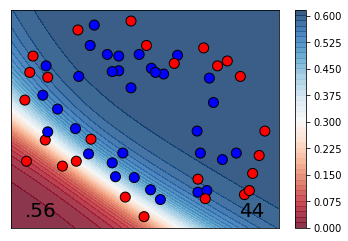

47 0.51


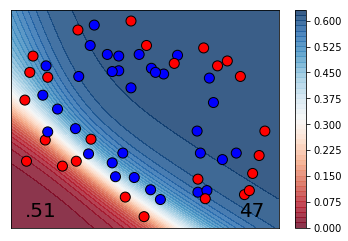

50 0.58


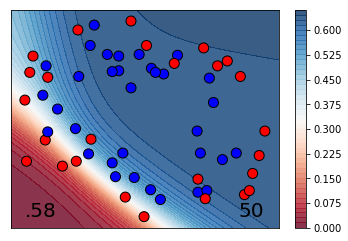

54 0.68


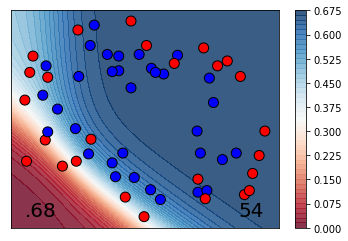

57 0.68


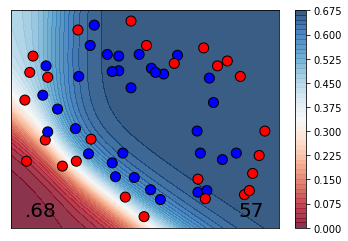

61 0.66


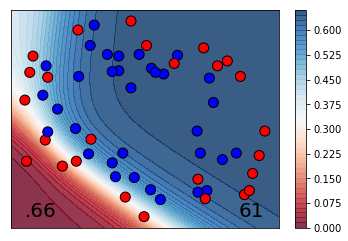

65 0.61


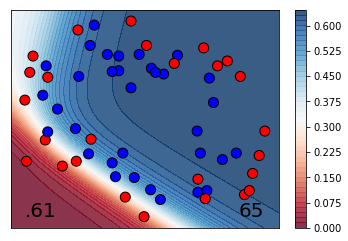

69 0.63


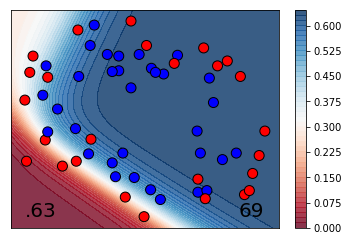

74 0.68


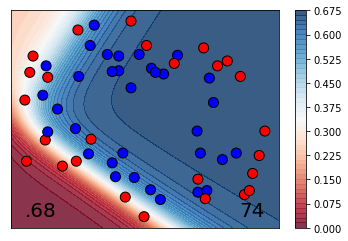

78 0.68


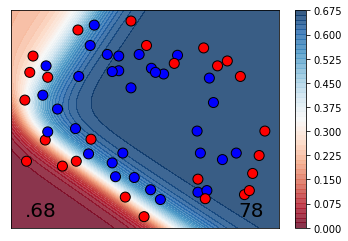

84 0.68


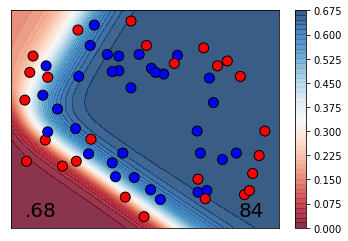

89 0.68


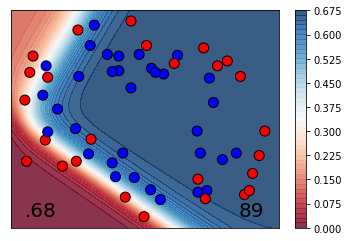

95 0.68


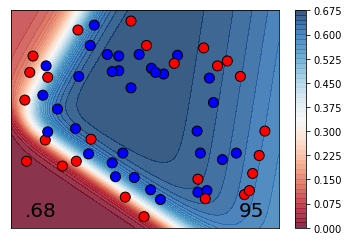

101 0.76


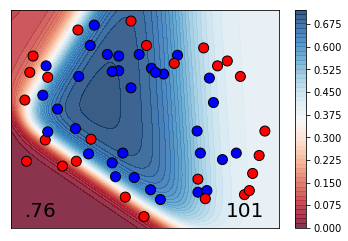

108 0.81


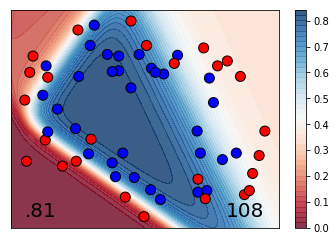

115 0.81


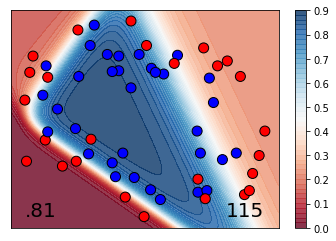

122 0.81


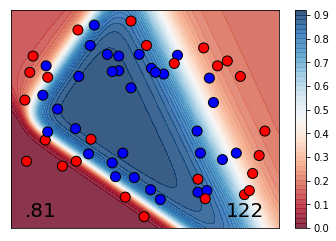

130 0.81


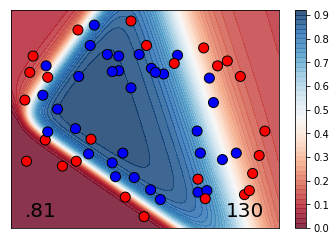

139 0.81


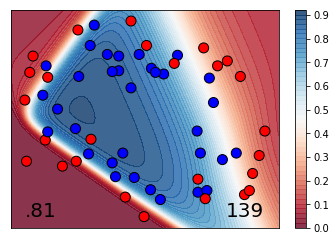

148 0.8


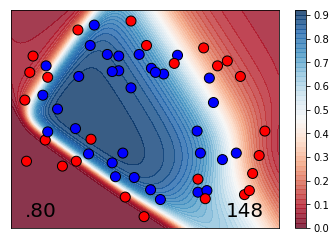

158 0.83


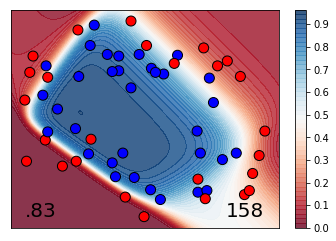

168 0.86


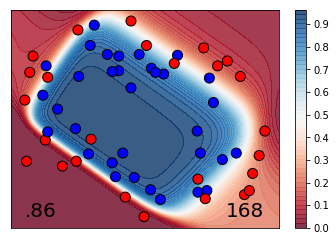

179 0.88


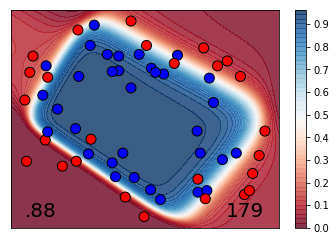

191 0.88


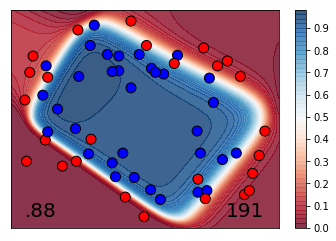

203 0.88


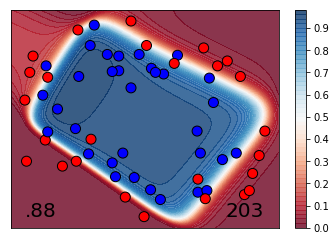

217 0.9


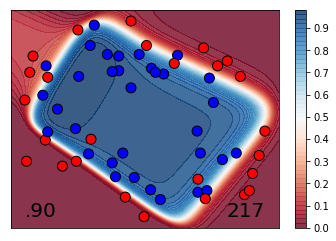

231 0.9


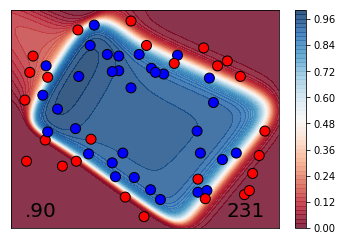

246 0.9


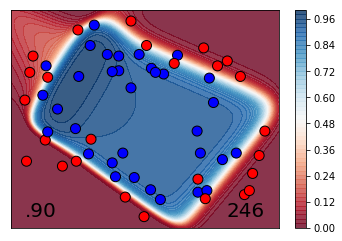

262 0.9


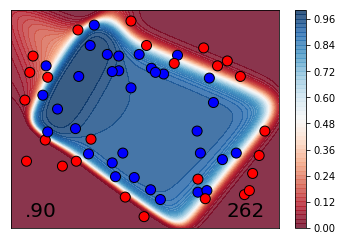

280 0.92


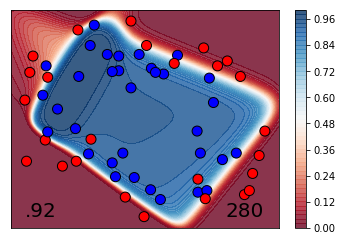

298 0.92


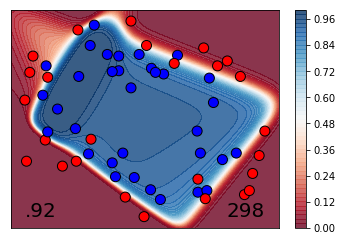

317 0.92


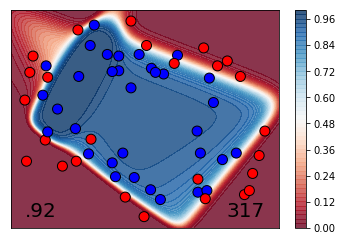

338 0.92


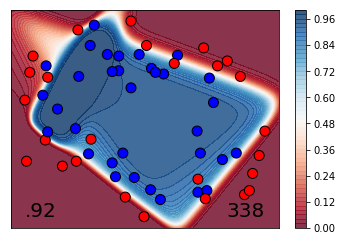

360 0.92


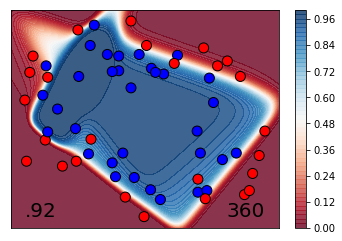

384 0.92


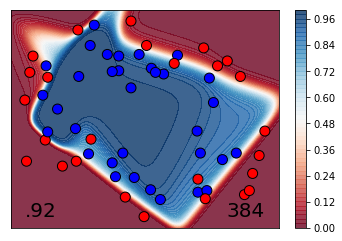

409 0.92


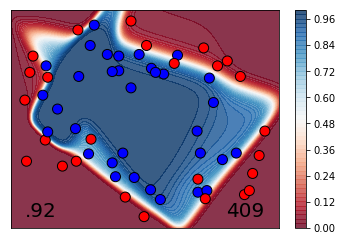

436 0.93


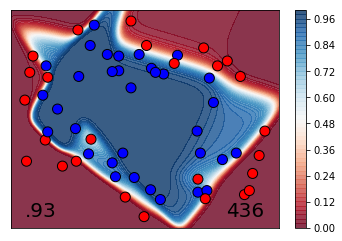

465 0.95


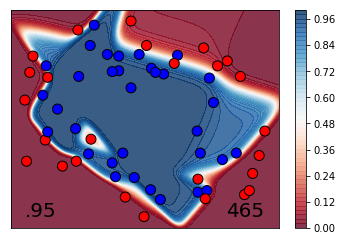

495 0.97


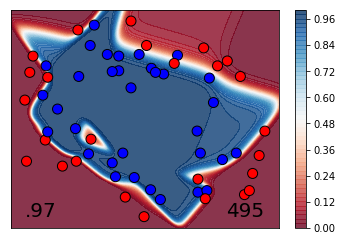

528 0.97


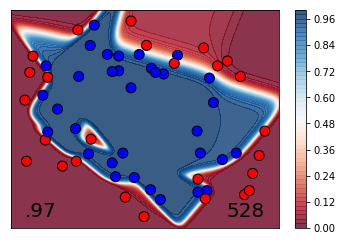

562 0.97


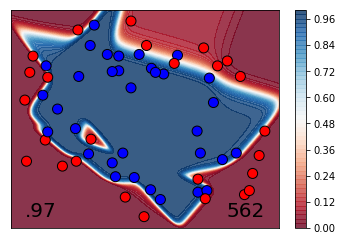

599 0.97


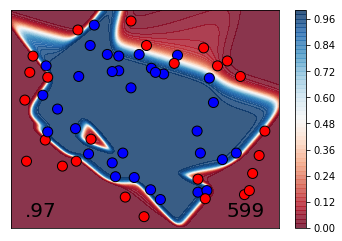

639 0.97


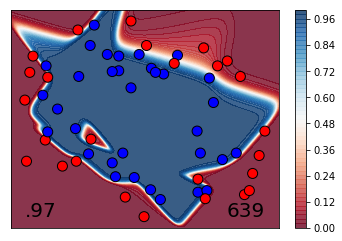

681 0.97


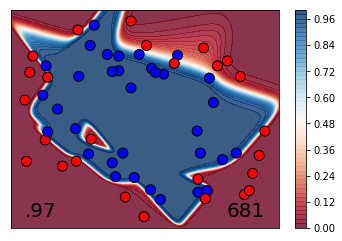

725 0.97


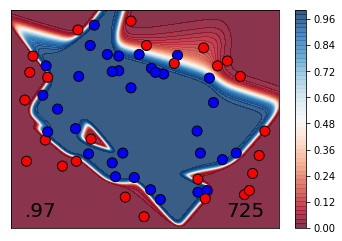

773 0.97


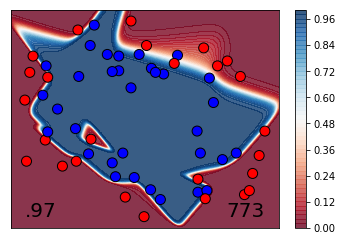

824 0.97


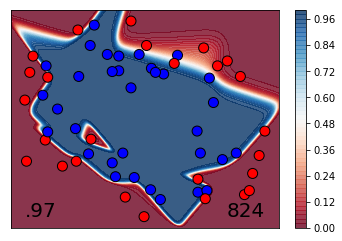

878 0.97


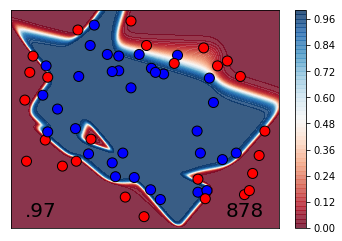

935 0.97


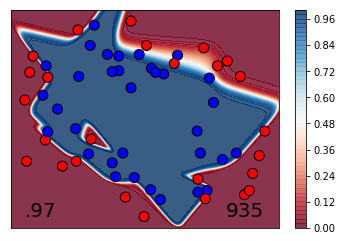

997 0.97


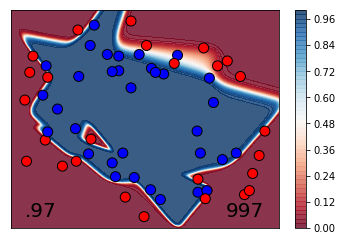

1062 0.97


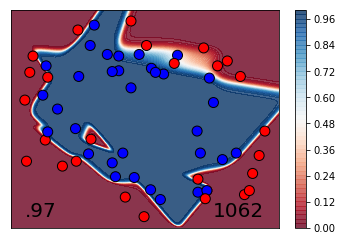

1132 1.0


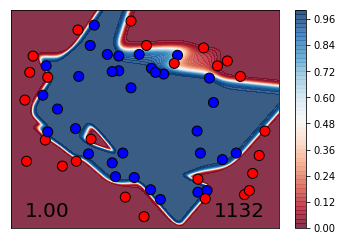

1206 1.0


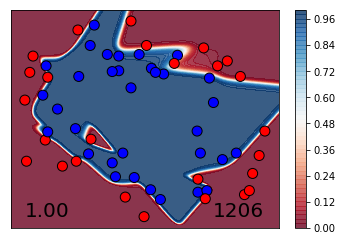

1285 1.0


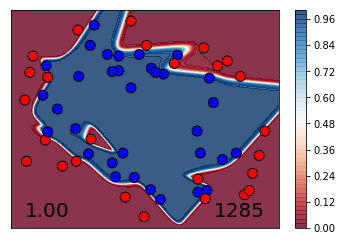

1370 1.0


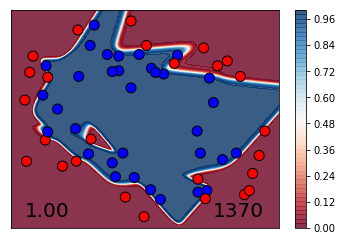

1460 1.0


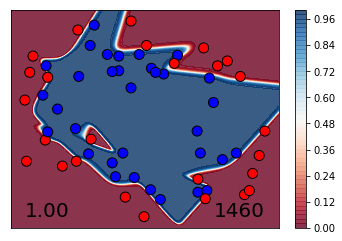

1555 1.0


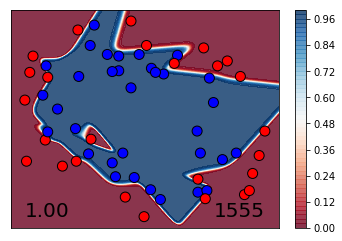

1657 1.0


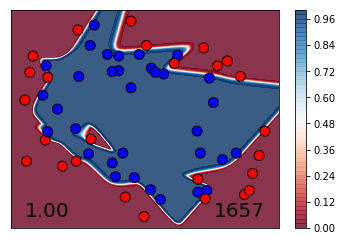

1766 1.0


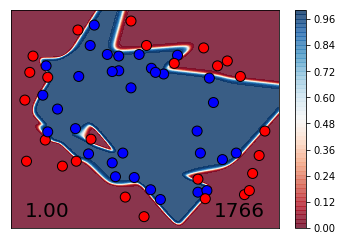

1882 1.0


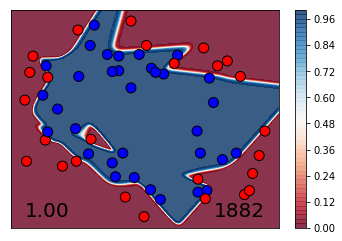

2006 1.0


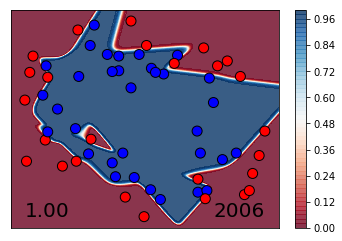

2137 1.0


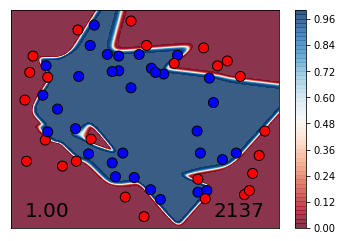

2277 1.0


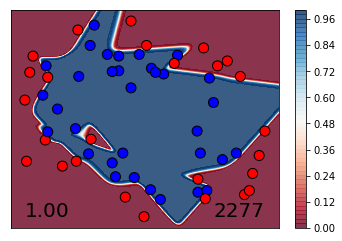

2427 1.0


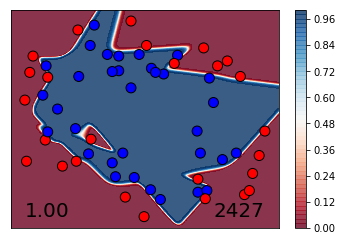

2586 1.0


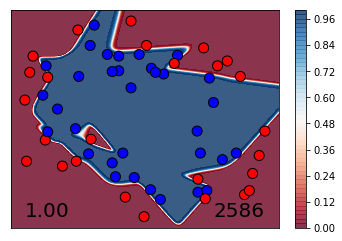

2756 1.0


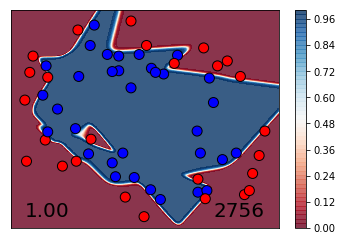

2937 1.0


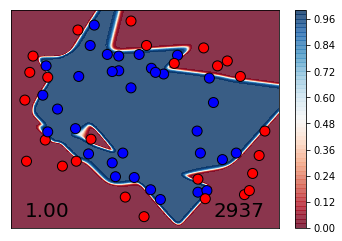

3130 1.0


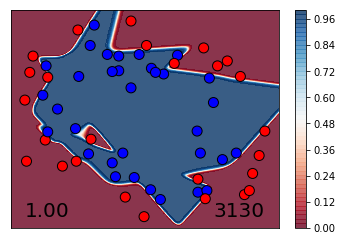

3335 1.0


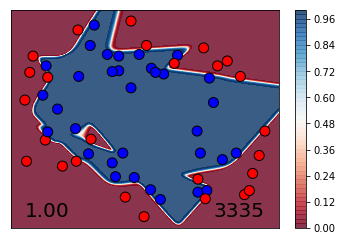

In [57]:
for i in gen_log_space(3335, 100):
    file = files[i]
    epoch = int(file.replace('./checkpoints/weights.','').split('.')[0].split('-')[0])
    acc = float(file.replace('./checkpoints/weights.','').split('-')[1].replace('.hdf5',''))
    print(epoch, acc)
    model.load_weights(file)
    f, ax = plt.subplots(1, 1) #, figsize=(6,6)
    plot_boundaries_for_video(X_train, y_train, model.predict_proba, score = acc, epoch = epoch, h = 0.01, margin=0.1, ax=ax)
    plt.show()